# WeatherPy
----

#### Observations & Analysis
- There is no relationship between latitude and humidity level. 
- Highest maximum temperatures occurred between -20 and 20 latitude. Temperature decreases as you move further away from 0 latitude. This is also represented by the linear regression plots for both southern and northern hemisphere. 
- There is no relationship between latitude and cloudiness or latitude and wind speed


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key
weather_api_key = "17ba8b3c6942b1a6938acf08cf8eb325"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = weather_api_key
units = 'imperial'

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

count_one = 0
set_one = 0

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=17ba8b3c6942b1a6938acf08cf8eb325&units=imperial&q=


In [4]:
city_two = []
cloudiness = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []

count_one = 0
set_one = 1

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | saint-augustin
Processing Record 4 of Set 1 | mersin
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | linqiong
Processing Record 8 of Set 1 | barrow
City not found. Skipping...
Processing Record 9 of Set 1 | gat
City not found. Skipping...
Processing Record 10 of Set 1 | hermanus
City not found. Skipping...
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | san quintin
Processing Record 15 of Set 1 | hasaki
City not found. Skipping...
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | alghero
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | esil
Processing Record 22 of Set 1 | alban

Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | tessalit
Processing Record 40 of Set 4 | balkanabat
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | bintulu
Processing Record 44 of Set 4 | bereznik
Processing Record 45 of Set 4 | jackson
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | manavalakurichi
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | vostok
Processing Record 1 of Set 5 | port hedland
Processing Record 2 of Set 5 | oranjemund
Processing Record 3 of Set 5 | klyuchi
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | vanimo
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | ust-maya
Processing Record 8 of Set 5 | brae
Processing Record 9 of Set 5 | ponta do sol
Processing Record 10 of Set 5 | nabire
Processing Record 11 of Set 5 | vaitape
Processing Record 12 of Set 5 | geraldton


Processing Record 31 of Set 8 | sao filipe
Processing Record 32 of Set 8 | letterkenny
Processing Record 33 of Set 8 | north bend
Processing Record 34 of Set 8 | joquicingo
Processing Record 35 of Set 8 | chik
Processing Record 36 of Set 8 | bonthe
Processing Record 37 of Set 8 | grahamstown
Processing Record 38 of Set 8 | mahebourg
Processing Record 39 of Set 8 | sandpoint
Processing Record 40 of Set 8 | laguna
Processing Record 41 of Set 8 | fairbanks
Processing Record 42 of Set 8 | iqaluit
Processing Record 43 of Set 8 | glens falls
City not found. Skipping...
Processing Record 44 of Set 8 | port moresby
Processing Record 45 of Set 8 | kondinskoye
Processing Record 46 of Set 8 | anadyr
Processing Record 47 of Set 8 | belen
Processing Record 48 of Set 8 | jaisinghnagar
Processing Record 49 of Set 8 | dezful
Processing Record 1 of Set 9 | malbug
Processing Record 2 of Set 9 | olga
Processing Record 3 of Set 9 | dubbo
Processing Record 4 of Set 9 | bukachacha
Processing Record 5 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudiness,
    "County": country,
    "Date": dates,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

In [6]:
weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.head(20)

,City,Cloudiness,County,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cherskiy,82,RU,1586898155,95,68.75,161.30,8.13,10.25
1,ushuaia,40,AR,1586897973,70,-54.80,-68.30,48.20,5.70
2,saint-augustin,51,CA,1586898155,70,51.23,-58.65,40.03,18.37
3,mersin,1,TR,1586898156,71,36.86,34.65,57.20,3.62
4,mar del plata,3,ES,1586898156,82,43.40,-4.01,59.00,5.82
5,carnarvon,35,AU,1586898157,69,-24.87,113.63,73.40,17.22
6,linqiong,0,CN,1586898157,100,30.42,103.46,55.40,2.19
7,barrow,90,US,1586898157,85,71.29,-156.79,12.20,5.82
8,gat,40,IL,1586898102,82,31.61,34.76,64.40,2.24
9,hermanus,0,ZA,1586897871,92,-34.42,19.23,62.01,7.16


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:

# Export the City_Data into a csv
weather_dataframe.to_csv('weather_data.csv')

count = len(weather_dataframe)
count

552

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

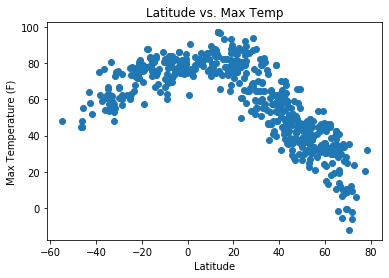

In [11]:
scatlat = weather_dataframe['Lat']
scattemp = weather_dataframe['Max Temp']

plt.scatter(scatlat, scattemp)
plt.title('Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Scatter_LatvMaxTemp')
plt.show()

## Latitude vs. Humidity Plot

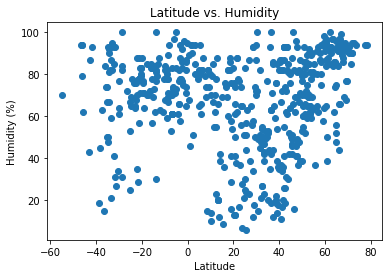

In [12]:
scathumid = weather_dataframe['Humidity']

plt.scatter(scatlat,scathumid)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Scater_LatvHumidity')
plt.show()

## Latitude vs. Cloudiness Plot

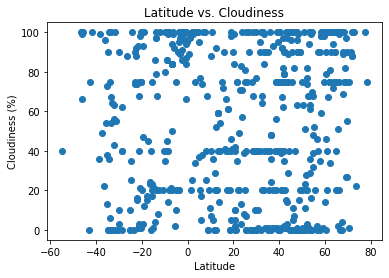

In [13]:
scatcloud = weather_dataframe['Cloudiness']

plt.scatter(scatlat,scatcloud)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Scater_LatvCloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

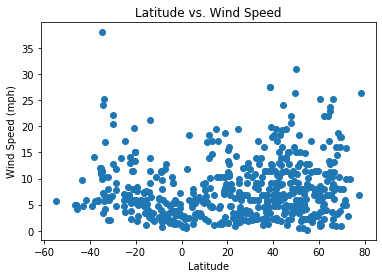

In [14]:
scatwind = weather_dataframe['Wind Speed']

plt.scatter(scatlat,scatwind)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Scater_LatvWindSpeed')
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots


In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = weather_dataframe.loc[weather_dataframe['Lat']>0.01]
southern_hemi = weather_dataframe.loc[weather_dataframe['Lat']<-0.01]

#northern_hemi.head()
southern_hemi.head()

,City,Cloudiness,County,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,ushuaia,40,AR,1586897973,70,-54.80,-68.30,48.20,5.70
5,carnarvon,35,AU,1586898157,69,-24.87,113.63,73.40,17.22
9,hermanus,0,ZA,1586897871,92,-34.42,19.23,62.01,7.16
10,kaitangata,66,NZ,1586898159,79,-46.28,169.85,48.00,5.01
11,rikitea,74,PF,1586898159,65,-23.12,-134.97,76.44,6.76


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

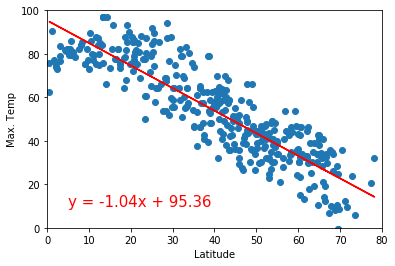

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

plt.savefig('NorthernLinearRegression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

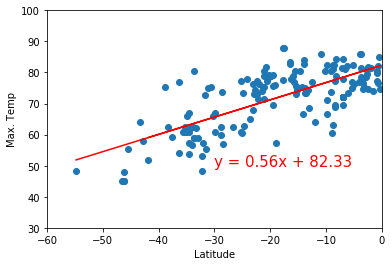

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

plt.savefig('SouthernLinearRegression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

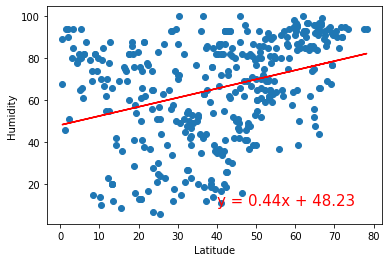

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("NorthernHumidityLinearRegression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

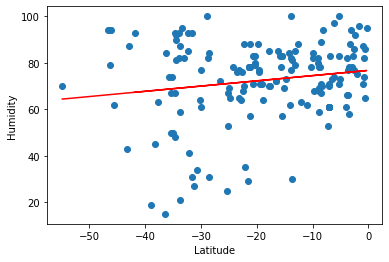

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("SouthernHumidityLinearRegression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

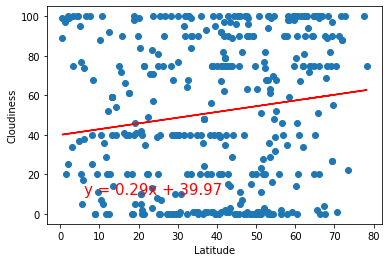

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("NorthernCloudinessLinearRegression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

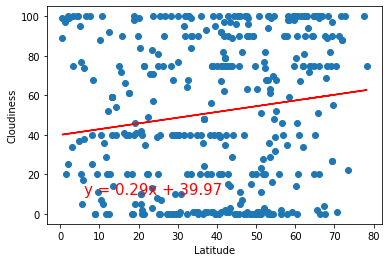

In [22]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("NorthernCloudinessLinearRegression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

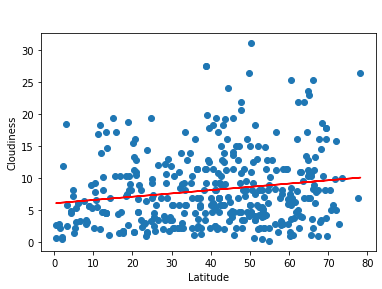

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,35),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("NorthernWindSpeedLinearRegression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

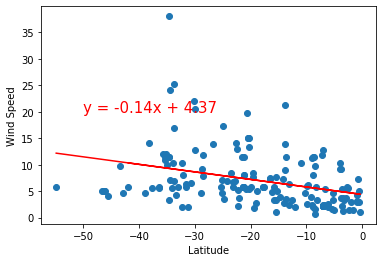

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

plt.savefig("SouthernWindSpeedLinearRegression.png")